## Making a witch

# Word Embeddings

In [1]:
!pip install gensim
!pip install matplotlib
!pip install scikit-learn
!pip install transformers
!pip install torch
!pip install nltk
!pip install vaderSentiment
!pip install seaborn


In [2]:
#importing all the packages to be used

import gensim.downloader
import numpy as np
import matplotlib.pyplot as plt
import torch
import string
import nltk
import random  # For adding jitter (to prevent overlapping)
import pandas as pd  # For creating a structured list
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # VADER for sentiment analysis
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /home/ucloud/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

[===-----------------------------------------------] 6.2% 23.4/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.6% 118.9/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 57.0% 214.3/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.4% 309.8/376.1MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



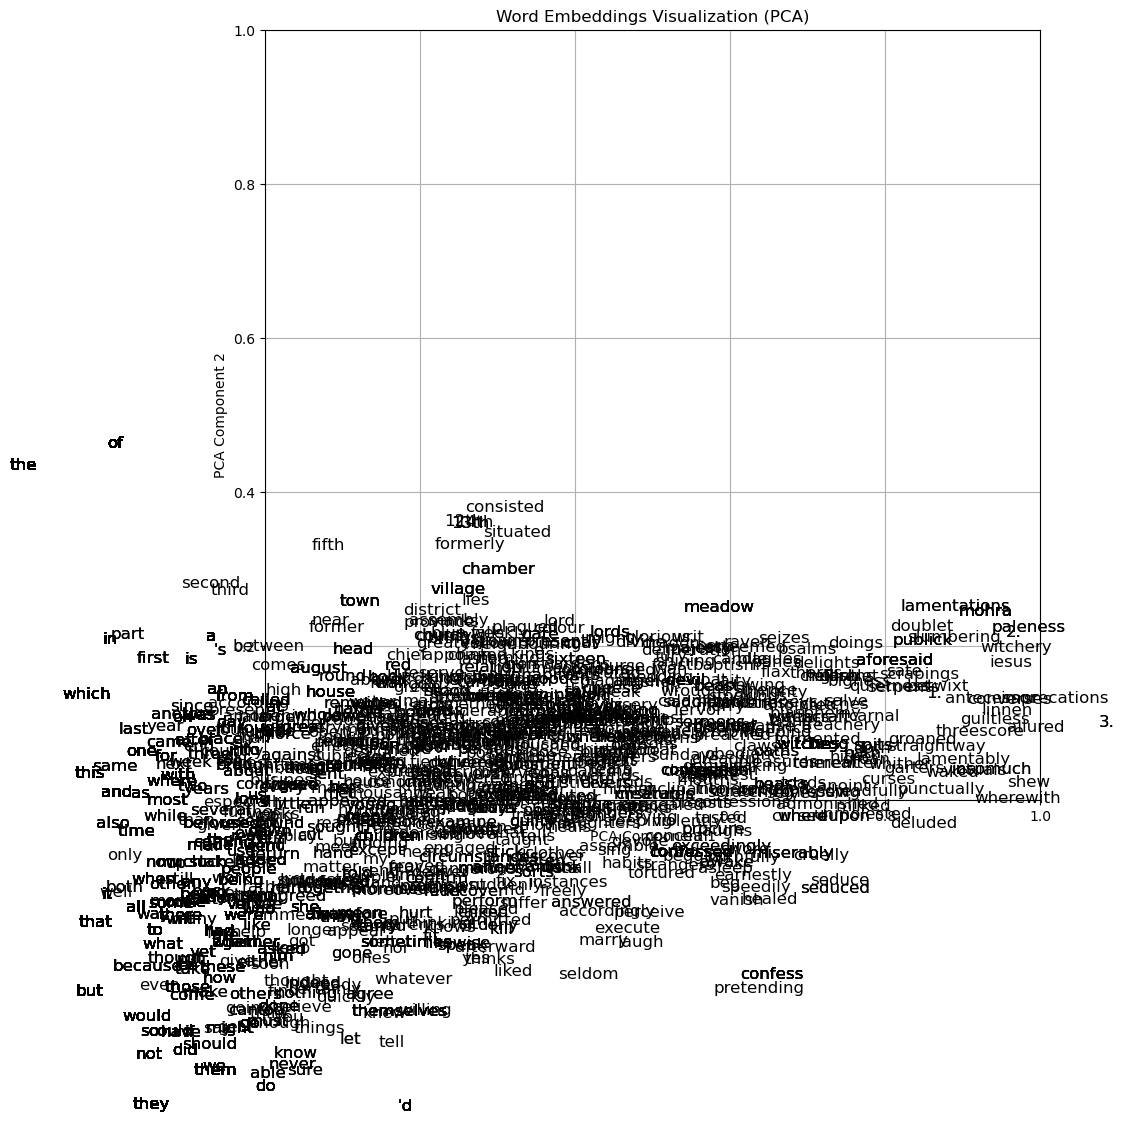

In [3]:
# Load the pre-trained GloVe embeddings (300-dimensional)
embeddings = gensim.downloader.load("glove-wiki-gigaword-300")

# Function to preprocess and tokenize the text
def preprocess_text(text):
    # Tokenize and remove punctuation
    tokens = word_tokenize(text.lower())  # Lowercasing the text
    tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    return tokens

# Load your own text file (make sure the file path is correct)
with open("Village_Mohra_1669_1670.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Preprocess the text
witch_tokens = preprocess_text(text)

# Get word embeddings for the tokens present in the text
word_vectors = []
words = []

for token in witch_tokens:
    if token in embeddings:
        word_vectors.append(embeddings[token])
        words.append(token)

# Convert the list of word vectors into a numpy array
word_vectors = np.array(word_vectors)

# Normalize the word vectors (optional but helpful for clustering)
word_vectors = normalize(word_vectors)

# Apply PCA (or TruncatedSVD) to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the word vectors in 2D space
plt.figure(figsize=(10, 10))

# Plot each word in the reduced space
for i, word in enumerate(words):
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=12)

plt.title("Word Embeddings Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

#its a bit hard to see anything from this, lets try highlight witch

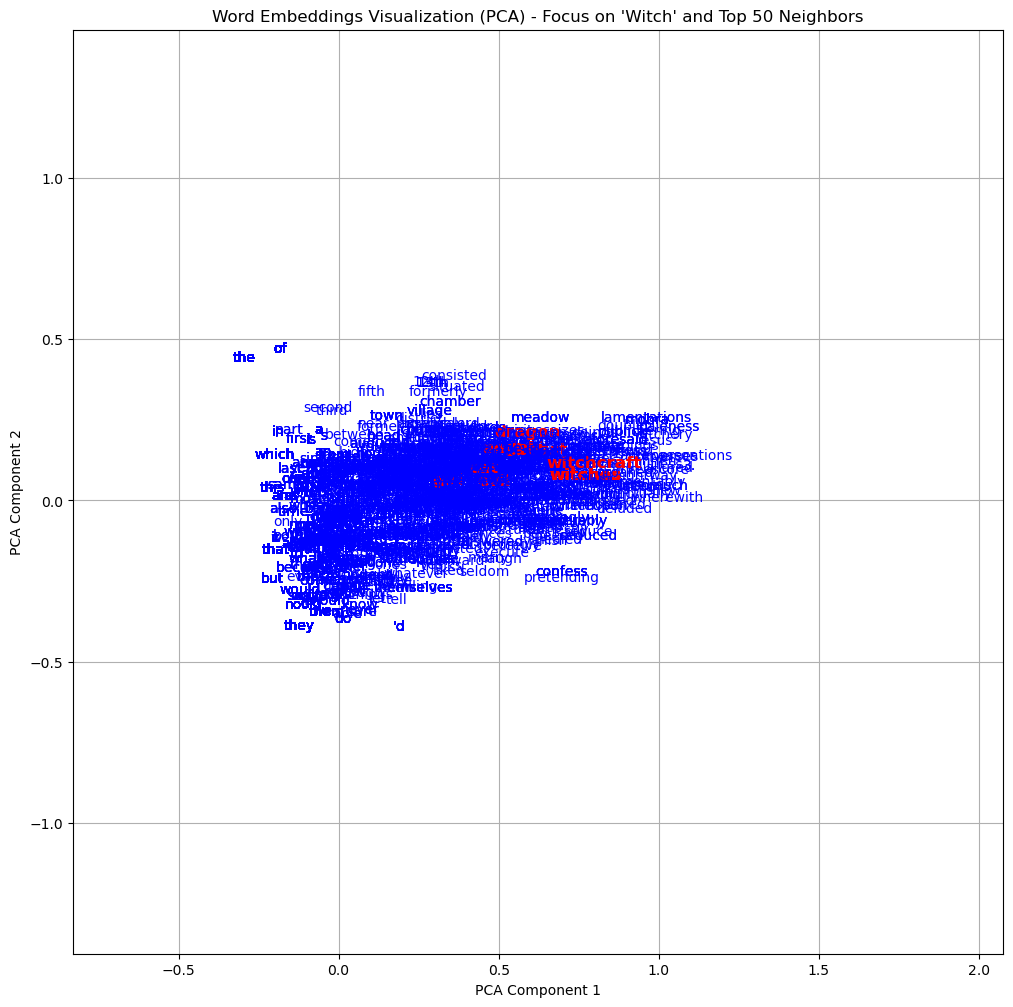

In [4]:
# Load the pre-trained GloVe embeddings (300-dimensional)
embeddings = gensim.downloader.load("glove-wiki-gigaword-300")

# Function to preprocess and tokenize the text
def preprocess_text(text):
    # Tokenize and remove punctuation
    tokens = word_tokenize(text.lower())  # Lowercasing the text
    tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    return tokens

# Load your own text file (make sure the file path is correct)
with open("Village_Mohra_1669_1670.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Preprocess the text
witch_tokens = preprocess_text(text)

# Get word embeddings for the tokens present in the text
word_vectors = []
words = []

for token in witch_tokens:
    if token in embeddings:
        word_vectors.append(embeddings[token])
        words.append(token)

# Convert the list of word vectors into a numpy array
word_vectors = np.array(word_vectors)

# Normalize the word vectors (optional but helpful for clustering)
word_vectors = normalize(word_vectors)

# Apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Now, we focus on 'witch' and its related words.
highlight_word = 'witch'

# Find the index of 'witch' and neighboring words (if present in the embeddings)
highlight_words = [highlight_word]
highlight_indices = []

for i, word in enumerate(words):
    if word == highlight_word:
        highlight_indices.append(i)
    # Optionally, add more neighboring words (you can specify others based on your analysis)
    elif word in ['witchcraft', 'spell', 'magic', 'occult']:  # Adjust these to include words of interest
        highlight_words.append(word)
        highlight_indices.append(i)

# Focus on the top 50 closest words to "witch"
# First, calculate similarity with "witch" and find the top 50 closest words
witch_vector = embeddings[highlight_word]
similarities = []

for i, word in enumerate(words):
    if word != highlight_word:  # Ignore "witch" itself for the calculation
        similarity = np.dot(witch_vector, embeddings[word])  # Cosine similarity (or dot product)
        similarities.append((word, similarity, i))

# Sort the words by similarity to "witch" and pick the top 50
similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
top_50_words = similarities[:50]  # Get top 50 most similar words
top_50_indices = [x[2] for x in top_50_words]  # Get indices of top 50 words

# Plot the word vectors in 2D space
plt.figure(figsize=(12, 12))  # Increase the figure size to spread words out more

# Plot each word in the reduced space
for i, word in enumerate(words):
    if i in top_50_indices:
        # Highlight words close to 'witch' in red, larger font size
        plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=12, color='red', weight='bold')
    elif word == highlight_word:
        # Highlight "witch" itself in a distinct way
        plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=16, color='blue', weight='bold')
    else:
        # Plot other words in blue with smaller font
        plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=10, color='blue')

# Add labels and title
plt.title("Word Embeddings Visualization (PCA) - Focus on 'Witch' and Top 50 Neighbors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Adjust axis limits to make sure all points are visible
plt.xlim(min(reduced_vectors[:, 0]) - 0.5, max(reduced_vectors[:, 0]) + 1)
plt.ylim(min(reduced_vectors[:, 1]) - 1, max(reduced_vectors[:, 1]) + 1)

plt.grid(True)
plt.show()


In [5]:
# Download necessary resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Function to read text from a file
def read_text_from_file(txt_file):
    with open(txt_file, 'r') as file:
        return file.read()

# Function to process text
def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to lowercase and remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    
    return filtered_tokens

# Example usage
txt_file = "Village_Mohra_1669_1670.txt"  # Update this to your .txt file

# Read text from the file
text = read_text_from_file(txt_file)

# Process the text
processed_text = process_text(text)

# Print the first few tokens from the processed text to verify
print(processed_text[:10])  # Print first 10 tokens

#strange and vvitchcraft are some of the most commmon themes


['relation', 'strange', 'vvitchcraft', 'discovered', 'village', 'mohra', 'swedeland', 'taken', 'publick', 'register']


[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Example .txt file path (replace with your file path)
txt_file = "Village_Mohra_1669_1670.txt"  # Update this to your .txt file

# Read text from the file
text = read_text_from_file(txt_file)

# Read text from a .txt file
def read_text_from_file(txt_file):
    with open(txt_file, 'r', encoding='utf-8') as file:
        return file.read()
# Preprocess the extracted text
tokens = preprocess_text(text)

# Create a list of sentences (for Word2Vec, it's a list of lists of words)
sentences = [tokens]  # In this case, we're using the entire text as one sentence; you can split it further if needed

# Train Word2Vec model on the text
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("my_word2vec_model.model")

# Find the most similar words to "witch"
similar_words = model.wv.most_similar("witch", topn=10)

# Print the similar words
print("Most similar words to 'witch':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

#the word witch and witchcraft does not appear in the canon episcopi, Innocent_VIII_BULL_Summis_desiderantes

Most similar words to 'witch':
keep: 0.26109322905540466
anger: 0.2545291781425476
sermons: 0.23313109576702118
thorns: 0.23201286792755127
seizes: 0.22284483909606934
esteemed: 0.21536901593208313
more: 0.2129892110824585
bright: 0.20872364938259125
ten: 0.19943544268608093
mohra: 0.19920429587364197


Most similar words to 'witch': for the maleus maleficarum
layman: 0.369638592004776
enchaining: 0.3523772954940796
completely: 0.3444567322731018
twenty-five: 0.3391387462615967
herding: 0.3327242136001587
beginning: 0.32642754912376404
married: 0.32317405939102173
faithagainst: 0.317766398191452
lordsreceive: 0.31613755226135254
penalty: 0.31519708037376404, 

and words most similar to witchcraft:

devil: 0.5990408658981323
body: 0.5327877402305603
devils: 0.5202767252922058
must: 0.5099382996559143
since: 0.4932129681110382
influence: 0.48987627029418945
would: 0.482847660779953
also: 0.47567644715309143
human: 0.4742788076400757
fact: 0.4738345146179199

defense_of_witchcraft_16th_century for witch.

nothing: 0.39295583963394165
law: 0.36100420355796814
tended: 0.3526802361011505
history: 0.35219091176986694
biblical: 0.3392481505870819
prevailed: 0.33832821249961853
greeved: 0.32707804441452026
use: 0.32546189427375793
dissolved: 0.3231249749660492
disgraced: 0.32087820768356323

defense_of_witchcraft_16th_century for witchcraft
vehemency: 0.37858664989471436
slip: 0.3200525939464569
philip: 0.31948530673980713
greefes: 0.31884250044822693
possessed: 0.31615862250328064
paralyses: 0.3155461847782135
quotation: 0.30700963735580444
seduce: 0.30652299523353577
civita: 0.3052346408367157
collected: 0.304033488035202


Most similar words to 'witch': Johannes
whit: 0.23007863759994507
methods: 0.22617599368095398
future: 0.2054850459098816
disciple: 0.19022104144096375
witnesses: 0.18697868287563324
disclosed: 0.18308378756046295
sexes: 0.17257650196552277
least: 0.16407811641693115
said: 0.1591009646654129
teachers: 0.15779918432235718

Most similar words to 'witchcraft': Johannes
obtain: 0.3153509497642517
benedict: 0.28614214062690735
conceive: 0.20539948344230652
die: 0.20274192094802856
upon: 0.18219099938869476
territory: 0.1750996708869934
relate: 0.1630513221025467
strolling: 0.1554524451494217
clutches: 0.1533164530992508
alas: 0.1529674530029297


Most similar words to 'witchcraft': Malemoe boy (no mention of witch)
longer: 0.3190409243106842
pea: 0.31445059180259705
signed: 0.29584434628486633
end: 0.2663293182849884
's: 0.2579411268234253
envoy: 0.2505703866481781
good: 0.24965161085128784
nitrous: 0.2369997501373291
men: 0.23646283149719238
part∣ly: 0.21931897103786469



Most similar words to 'witchcraft': Village Mohra
hither: 0.26903536915779114
consulting: 0.259317010641098
fahluna: 0.25308266282081604
plagued: 0.2497137188911438
gardens: 0.249639630317688
divine: 0.24946101009845734
present: 0.24424505233764648
instant: 0.23838093876838684
august: 0.2360929548740387
forth: 0.2255447804927826

Most similar words to 'witch': Village mohra
sate: 0.2955816984176636
age: 0.2941800355911255
gray: 0.2817767262458801
guiltless: 0.2655707001686096
evil: 0.26007500290870667
order: 0.259035587310791
pains: 0.2508883774280548
scraping: 0.24871321022510529
treachery: 0.2382482886314392
sons: 0.2382245808839798

[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


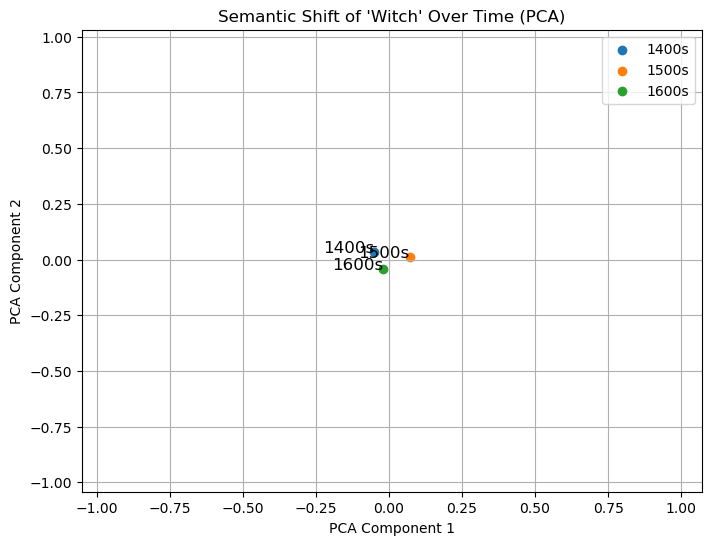

In [7]:
#looking at the semantic drift over time

# Extract 'witch' vectors from different time periods

# Download stop words
nltk.download('stopwords')
nltk.download('punkt')

# Load the stop words list
stop_words = set(stopwords.words('english'))

# Preprocess text and remove stop words
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words]
    return tokens

# Read text from a .txt file
def read_text_from_file(txt_file):
    with open(txt_file, 'r', encoding='utf-8') as file:
        return file.read()


text_1400s1 = read_text_from_file('malleus_maleficarum-1487.txt')
text_1400s2 = read_text_from_file('Innocent_VIII_BULL_Summis_desiderantes_1484.txt')
text_1400s3 = read_text_from_file('Johannes_Nider_the_ANT HILL_circa_1437.txt')
text_1500s = read_text_from_file('defense_of_witchcraft_16th_century.txt')
text_1500s2 = read_text_from_file('The Discoverie of Witchcraft 1584.txt')
text_1600s1 = read_text_from_file('Village_Mohra_1669_1670.txt')
text_1600s2 = read_text_from_file('Malmoe_boy_1678.txt')
text_1600s3 = read_text_from_file('A Treatise of Witchcraft 1616.txt')

# Preprocess the text
tokens_1400s1 = preprocess_text(text_1400s1)
tokens_1400s2 = preprocess_text(text_1400s2)
tokens_1400s3 = preprocess_text(text_1400s3)
tokens_1500s = preprocess_text(text_1500s)
tokens_1500s2 = preprocess_text(text_1500s2)
tokens_1600s1 = preprocess_text(text_1600s1)
tokens_1600s2 = preprocess_text(text_1600s2)
tokens_1600s3 = preprocess_text(text_1600s3)

sentences_1400s1 = [tokens_1400s1]
sentences_1400s2 = [tokens_1400s2]
sentences_1400s3 = [tokens_1400s3]# Wrap the tokens in a list to represent the sentence
sentences_1500s1 = [tokens_1500s]
sentences_1500s2 = [tokens_1500s2]
sentences_1600s1 = [tokens_1600s1]
sentences_1600s2 = [tokens_1600s2]
sentences_1600s3 = [tokens_1600s3]


# Now combine all the tokenized sentences into one list (for training)
sentences_1500s = sentences_1500s1 + sentences_1500s2
sentences_1400s = sentences_1400s1 + sentences_1400s2 + sentences_1400s3
sentences_1600s = sentences_1600s1 + sentences_1600s2 + sentences_1600s3

model_1400s = Word2Vec(sentences_1400s, vector_size=100, window=5, min_count=1)
model_1500s = Word2Vec(sentences_1500s, vector_size=100, window=5, min_count=1)
model_1600s = Word2Vec(sentences_1600s, vector_size=100, window=5, min_count=1)

witch_1400s = model_1400s.wv['witch']
witch_1500s = model_1500s.wv['witch']
witch_1600s = model_1600s.wv['witch']

# Combine these vectors into a list for visualization
word_vectors = np.array([witch_1400s, witch_1500s, witch_1600s])
words = ['Witch (1400s)', 'Witch (1500s)', 'Witch (1600s)']

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the reduced vectors
plt.figure(figsize=(8, 6))

# Plot each vector (for 1400s, 1500s, 1600s)
time_periods = ['1400s', '1500s', '1600s']
for i, period in enumerate(time_periods):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=period)
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], time_periods[i], fontsize=12, ha='right')

# Adjust axis limits to make sure all points are visible
plt.xlim(min(reduced_vectors[:, 0]) - 1, max(reduced_vectors[:, 0]) + 1)
plt.ylim(min(reduced_vectors[:, 1]) - 1, max(reduced_vectors[:, 1]) + 1)

# Add labels and title
plt.title("Semantic Shift of 'Witch' Over Time (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


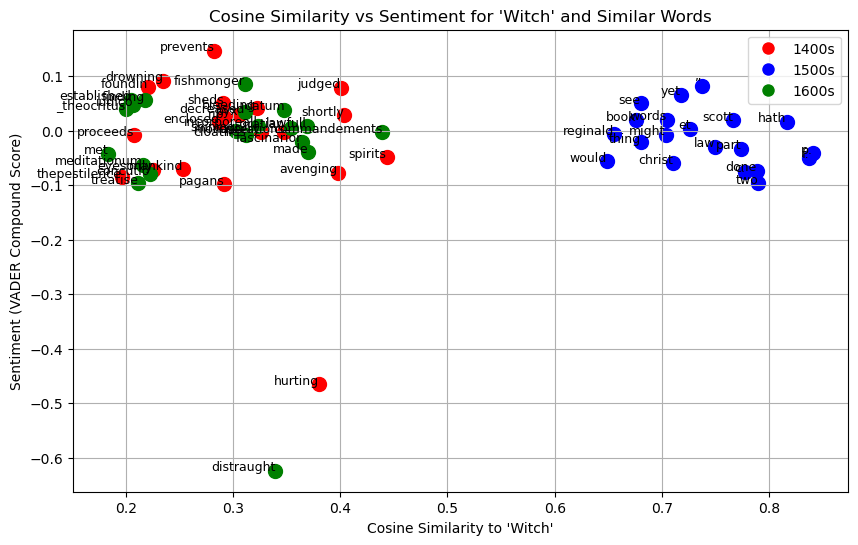

In [8]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define function to get the most similar words for "witch" from each model
def get_most_similar_words(model, word, top_n=20):
    # Get most similar words to "witch"
    similar_words = model.wv.most_similar(word, topn=top_n)
    return similar_words

# Define function to calculate sentiment using VADER
def get_sentiment(word):
    sentiment_score = analyzer.polarity_scores(word)
    return sentiment_score['compound']  # VADER compound score ranges from -1 (negative) to 1 (positive)

# Function to add jitter to prevent overlapping in plots
def add_jitter(x, y, jitter_strength=0.1):
    return x + random.uniform(-jitter_strength, jitter_strength), y + random.uniform(-jitter_strength, jitter_strength)

# Get most similar words for "witch" for each time period
similar_1400s = get_most_similar_words(model_1400s, 'witch')
similar_1500s = get_most_similar_words(model_1500s, 'witch')
similar_1600s = get_most_similar_words(model_1600s, 'witch')

# Combine all the similar words from different time periods
words = []
similarities = []
sentiments = []
time_periods = []

# Process each time period's similar words
for word, similarity in similar_1400s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1400s')

for word, similarity in similar_1500s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1500s')

for word, similarity in similar_1600s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1600s')

# Define color mapping for each time period
color_mapping = {'1400s': 'red', '1500s': 'blue', '1600s': 'green'}

# Plot the results
plt.figure(figsize=(10, 6))

# Scatter plot with color coding based on time periods
for i, (word, sim, sentiment, period) in enumerate(zip(words, similarities, sentiments, time_periods)):
    x, y = add_jitter(sim, sentiment)
    color = color_mapping[period]  # Use the time period to get the color
    plt.scatter(x, y, color=color, s=100)
    plt.text(x, y, word, fontsize=9, ha='right', color='black')

# Add labels and title
plt.title("Cosine Similarity vs Sentiment for 'Witch' and Similar Words")
plt.xlabel("Cosine Similarity to 'Witch'")
plt.ylabel("Sentiment (VADER Compound Score)")
plt.grid(True)

# Create a legend for time periods
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[period], markersize=10) for period in ['1400s', '1500s', '1600s']]
plt.legend(handles=handles, labels=['1400s', '1500s', '1600s'])

plt.show()


           Word  Cosine Similarity  Sentiment Time Period
0         devil           0.634959    -0.6597       1400s
1          evil           0.606587    -0.6597       1400s
2          body           0.576789     0.0000       1400s
3        devils           0.556189    -0.5719       1400s
4          must           0.555327     0.0000       1400s
5        bodies           0.550689     0.0000       1400s
6         since           0.548484     0.0000       1400s
7      question           0.534835     0.0000       1400s
8          good           0.529612     0.4404       1400s
9         stars           0.527580     0.0000       1400s
10         scot           0.983579     0.0000       1500s
11            “           0.982624     0.0000       1500s
12            ”           0.982197     0.0000       1500s
13       things           0.981670     0.0000       1500s
14       reason           0.981305     0.0000       1500s
15       though           0.981212     0.0000       1500s
16      witche

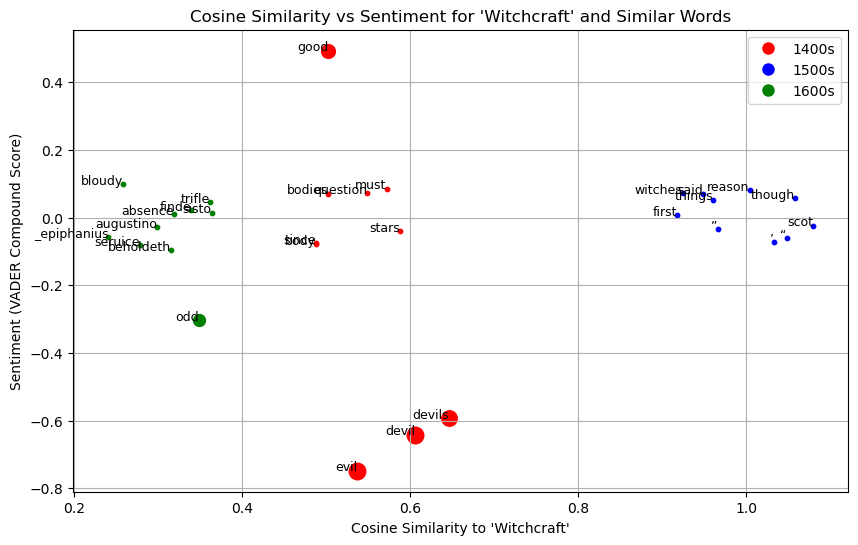

In [9]:
# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define function to get the most similar words for "witchcraft" from each model
def get_most_similar_words(model, word, top_n=10):
    # Get most similar words to "witchcraft"
    similar_words = model.wv.most_similar(word, topn=top_n)
    return similar_words

# Define function to calculate sentiment using VADER
def get_sentiment(word):
    sentiment_score = analyzer.polarity_scores(word)
    return sentiment_score['compound']  # VADER compound score ranges from -1 (negative) to 1 (positive)

# Function to add jitter to prevent overlapping in plots
def add_jitter(x, y, jitter_strength=0.1):
    return x + random.uniform(-jitter_strength, jitter_strength), y + random.uniform(-jitter_strength, jitter_strength)

# Get most similar words for "witchcraft" for each time period
similar_1400s = get_most_similar_words(model_1400s, 'witchcraft')
similar_1500s = get_most_similar_words(model_1500s, 'witchcraft')
similar_1600s = get_most_similar_words(model_1600s, 'witchcraft')

# Combine all the similar words from different time periods
words = []
similarities = []
sentiments = []
time_periods = []

# Process each time period's similar words
for word, similarity in similar_1400s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1400s')

for word, similarity in similar_1500s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1500s')

for word, similarity in similar_1600s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1600s')

# Define color mapping for each time period
color_mapping = {'1400s': 'red', '1500s': 'blue', '1600s': 'green'}

# Create a pandas DataFrame to display the information
data = {
    'Word': words,
    'Cosine Similarity': similarities,
    'Sentiment': sentiments,
    'Time Period': time_periods
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Plot the results
plt.figure(figsize=(10, 6))

# Scatter plot with color coding based on time periods
for i, (word, sim, sentiment, period) in enumerate(zip(words, similarities, sentiments, time_periods)):
    # Add jitter to the values
    x, y = add_jitter(sim, sentiment)
    
    # Size of the marker is based on the absolute sentiment value
    size = 10 + abs(sentiment) * 200  # Scale size based on sentiment magnitude
    
    color = color_mapping[period]  # Use the time period to get the color
    plt.scatter(x, y, color=color, s=size)  # Use calculated size here
    plt.text(x, y, word, fontsize=9, ha='right', color='black')

# Add labels and title
plt.title("Cosine Similarity vs Sentiment for 'Witchcraft' and Similar Words")
plt.xlabel("Cosine Similarity to 'Witchcraft'")
plt.ylabel("Sentiment (VADER Compound Score)")
plt.grid(True)

# Create a legend for time periods
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[period], markersize=10) for period in ['1400s', '1500s', '1600s']]
plt.legend(handles=handles, labels=['1400s', '1500s', '1600s'])

plt.show()


[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

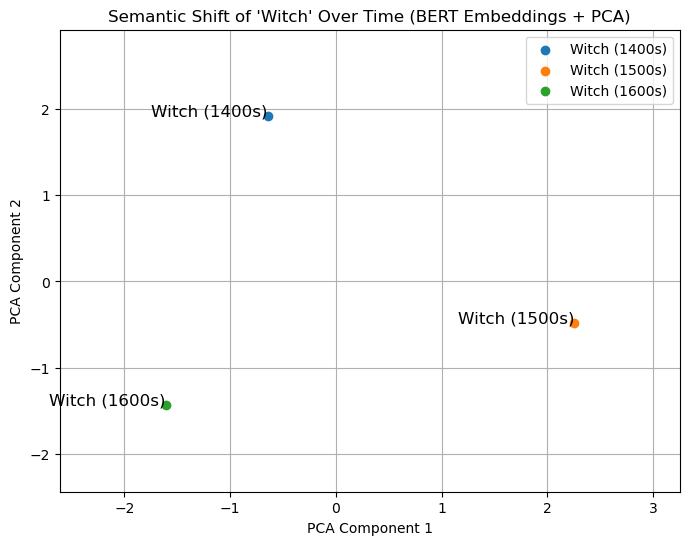

In [10]:
#Now trying it with BERT instead to get a more context filled output
nltk.download('stopwords')
nltk.download('punkt')

# Load the stop words list
stop_words = set(stopwords.words('english'))

# Preprocess text and remove stop words
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    # Remove punctuation and stop words
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words]
    return tokens

# Read text from a .txt file
def read_text_from_file(txt_file):
    with open(txt_file, 'r', encoding='utf-8') as file:
        return file.read()

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embedding for a text
def get_bert_embedding_for_text(text):
    # Tokenize the text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Get the embeddings for the [CLS] token (representing the whole text)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Example text for each period (replace these with actual texts from your corpus)
text_1400s1 = read_text_from_file('malleus_maleficarum-1487.txt')
text_1400s2 = read_text_from_file('Innocent_VIII_BULL_Summis_desiderantes_1484.txt')
text_1400s3 = read_text_from_file('Johannes_Nider_the_ANT HILL_circa_1437.txt')
text_1500s = read_text_from_file('defense_of_witchcraft_16th_century.txt')
text_1500s2 = read_text_from_file('The Discoverie of Witchcraft 1584.txt')
text_1600s1 = read_text_from_file('Village_Mohra_1669_1670.txt')
text_1600s2 = read_text_from_file('Malmoe_boy_1678.txt')
text_1600s3 = read_text_from_file('A Treatise of Witchcraft 1616.txt')

# Preprocess the text
tokens_1400s1 = preprocess_text(text_1400s1)
tokens_1400s2 = preprocess_text(text_1400s2)
tokens_1400s3 = preprocess_text(text_1400s3)
tokens_1500s = preprocess_text(text_1500s)
tokens_1500s2 = preprocess_text(text_1500s2)
tokens_1600s1 = preprocess_text(text_1600s1)
tokens_1600s2 = preprocess_text(text_1600s2)
tokens_1600s3 = preprocess_text(text_1600s3)

# Now combine all the tokenized sentences into one list (for training)
sentences_1400s = [text_1400s1, text_1400s2, text_1400s3]
sentences_1500s = [text_1500s, text_1500s2]
sentences_1600s = [text_1600s1, text_1600s2, text_1600s3]

# Get BERT embeddings for the word "witch" in each time period
def get_witch_embedding_for_period(sentences):
    embeddings = []
    for sentence in sentences:
        # Get the BERT embedding for the sentence
        embedding = get_bert_embedding_for_text(sentence)
        embeddings.append(embedding)
    return embeddings

witch_embeddings_1400s = get_witch_embedding_for_period(sentences_1400s)
witch_embeddings_1500s = get_witch_embedding_for_period(sentences_1500s)
witch_embeddings_1600s = get_witch_embedding_for_period(sentences_1600s)

# Average embeddings for each period (to represent "witch" across multiple sentences)
avg_witch_1400s = np.mean(witch_embeddings_1400s, axis=0)
avg_witch_1500s = np.mean(witch_embeddings_1500s, axis=0)
avg_witch_1600s = np.mean(witch_embeddings_1600s, axis=0)

# Combine these embeddings into a list for visualization
word_vectors = np.array([avg_witch_1400s, avg_witch_1500s, avg_witch_1600s])
periods = ['Witch (1400s)', 'Witch (1500s)', 'Witch (1600s)']

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the reduced vectors
plt.figure(figsize=(8, 6))

# Plot each vector (for 1400s, 1500s, 1600s)
for i, period in enumerate(periods):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=period)
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], periods[i], fontsize=12, ha='right')

# Adjust axis limits to make sure all points are visible
plt.xlim(min(reduced_vectors[:, 0]) - 1, max(reduced_vectors[:, 0]) + 1)
plt.ylim(min(reduced_vectors[:, 1]) - 1, max(reduced_vectors[:, 1]) + 1)

# Add labels and title
plt.title("Semantic Shift of 'Witch' Over Time (BERT Embeddings + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


[nltk_data] Downloading package stopwords to /home/ucloud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ucloud/nltk_data...
Processing words for 'witch': 100%|██████████| 6526/6526 [01:01<00:00, 105.45word/s]


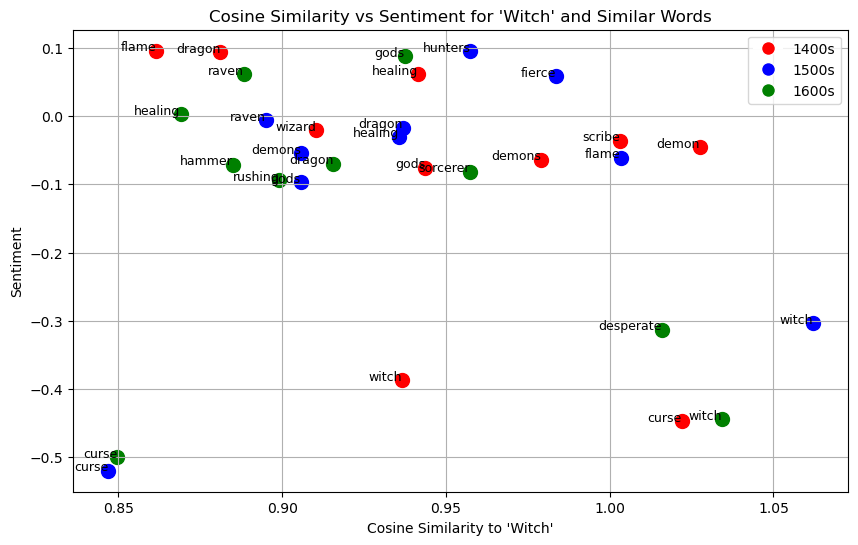

In [11]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Download stopwords and sentiment analyzer lexicon
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

# Preprocess text by tokenizing and removing stop words
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words]
    return tokens

# Function to get BERT embedding for a word
def get_bert_embedding(word):
    inputs = tokenizer(word, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    # Return the embedding of the [CLS] token (or the mean of all token embeddings)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Function to calculate cosine similarity between two vectors
def calculate_cosine_similarity(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

# Function to get most similar words to 'witch' using cosine similarity from the text
def get_most_similar_words_from_text(text, target_word, top_n=10):
    # Tokenize the text and get unique words
    words_in_text = list(set(preprocess_text(text)))
    
    # Get the BERT embedding for 'witch'
    target_embedding = get_bert_embedding(target_word)
    
    # List to store similarity scores
    similarities = []
    
    # Calculate cosine similarity between 'witch' and every word in the text with progress tracking
    for word in tqdm(words_in_text, desc=f"Processing words for '{target_word}'", unit="word"):
        word_embedding = get_bert_embedding(word)
        sim = calculate_cosine_similarity(target_embedding, word_embedding)
        similarities.append((word, sim))
    
    # Sort by similarity score and return the top N most similar words
    sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    return sorted_similarities[:top_n]

# Function to get sentiment using VADER
def get_sentiment(word):
    sentiment = sia.polarity_scores(word)
    return sentiment['compound']  # Compound score ranges from -1 to 1

# Example texts for different time periods (replace with actual text files)
text_1400s1 = read_text_from_file('malleus_maleficarum-1487.txt')
text_1400s2 = read_text_from_file('Innocent_VIII_BULL_Summis_desiderantes_1484.txt')
text_1400s3 = read_text_from_file('Johannes_Nider_the_ANT HILL_circa_1437.txt')
text_1500s = read_text_from_file('defense_of_witchcraft_16th_century.txt')
text_1500s2 = read_text_from_file('The Discoverie of Witchcraft 1584.txt')
text_1600s1 = read_text_from_file('Village_Mohra_1669_1670.txt')
text_1600s2 = read_text_from_file('Malmoe_boy_1678.txt')
text_1600s3 = read_text_from_file('A Treatise of Witchcraft 1616.txt')

# Get the most similar words to 'witch' from each time period's text
similar_words_1400s = get_most_similar_words_from_text(text_1400s1 + text_1400s2 + text_1400s3, 'witch', top_n=10)
similar_words_1500s = get_most_similar_words_from_text(text_1500s + text_1500s2, 'witch', top_n=10)
similar_words_1600s = get_most_similar_words_from_text(text_1600s1 + text_1600s2 + text_1600s3, 'witch', top_n=10)

# Prepare the data for plotting
words = []
similarities = []
sentiments = []
time_periods = []

# Process each time period's similar words
for word, similarity in similar_words_1400s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1400s')

for word, similarity in similar_words_1500s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1500s')

for word, similarity in similar_words_1600s:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1600s')

# Define color mapping for each time period
color_mapping = {'1400s': 'red', '1500s': 'blue', '1600s': 'green'}

# Plot the results
plt.figure(figsize=(10, 6))

# Scatter plot with jitter to prevent overlap
for i, (word, sim, sentiment, period) in enumerate(zip(words, similarities, sentiments, time_periods)):
    # Add jitter to prevent overlap of points
    x, y = add_jitter(sim, sentiment)
    
    # Plot each word as a point
    color = color_mapping[period]  # Use the time period to get the color
    plt.scatter(x, y, color=color, s=100)
    
    # Add the word as a label
    plt.text(x, y, word, fontsize=9, ha='right', color='black')

# Add labels and title
plt.title("Cosine Similarity vs Sentiment for 'Witch' and Similar Words")
plt.xlabel("Cosine Similarity to 'Witch'")
plt.ylabel("Sentiment")
plt.grid(True)

# Create a legend for time periods
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[period], markersize=10) for period in ['1400s', '1500s', '1600s']]
plt.legend(handles=handles, labels=['1400s', '1500s', '1600s'])

# Show plot
plt.show()


In [12]:
#finding the mean, medians and variance 

for period in ['1400s', '1500s', '1600s']:
    period_sentiments = [sentiments[i] for i in range(len(sentiments)) if time_periods[i] == period]
    print(f"{period} - Mean Sentiment: {np.mean(period_sentiments):.2f}, Median Sentiment: {np.median(period_sentiments):.2f}, Variance: {np.var(period_sentiments):.2f}")


1400s - Mean Sentiment: -0.09, Median Sentiment: 0.00, Variance: 0.03
1500s - Mean Sentiment: -0.09, Median Sentiment: 0.00, Variance: 0.03
1600s - Mean Sentiment: -0.12, Median Sentiment: 0.00, Variance: 0.04


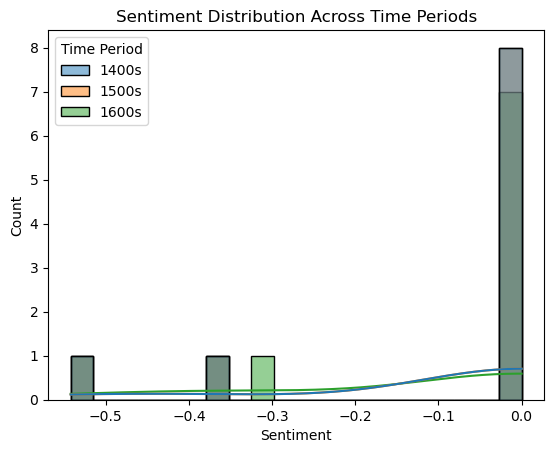

In [13]:
#sentiment distribution

sns.histplot(data={"Sentiment": sentiments, "Time Period": time_periods}, x="Sentiment", hue="Time Period", kde=True, bins=20)
plt.title("Sentiment Distribution Across Time Periods")
plt.show()


In [14]:
#correlation

for period in ['1400s', '1500s', '1600s']:
    period_data = [(similarities[i], sentiments[i]) for i in range(len(similarities)) if time_periods[i] == period]
    similarity_values, sentiment_values = zip(*period_data)
    correlation, p_value = pearsonr(similarity_values, sentiment_values)
    print(f"{period} - Correlation: {correlation:.2f}, P-value: {p_value:.2e}")


1400s - Correlation: -0.36, P-value: 3.02e-01
1500s - Correlation: -0.43, P-value: 2.12e-01
1600s - Correlation: -0.40, P-value: 2.47e-01


In [15]:
#semantic clusters

# Extract embeddings for the similar words
word_embeddings = np.array([get_bert_embedding(word) for word in words])

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(word_embeddings)

# Add cluster labels to each word
clusters = kmeans.labels_

for cluster in range(3):
    cluster_words = [words[i] for i in range(len(words)) if clusters[i] == cluster]
    print(f"Cluster {cluster + 1}: {', '.join(cluster_words)}")


Cluster 1: demon, demons, scribe, healing, flame, curse, gods, hunters, demons, fierce, healing, flame, curse, gods, raven, healing, curse, gods, raven, desperate, rushing
Cluster 2: dragon, dragon, dragon
Cluster 3: witch, wizard, witch, witch, hammer, sorcerer


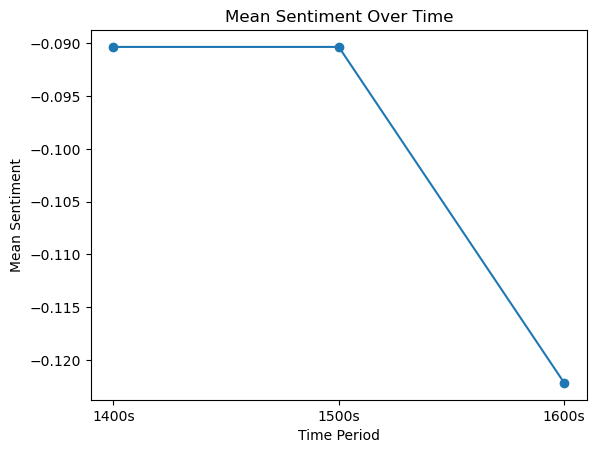

In [16]:
#evolution of sentiment

sentiment_means = {
    period: np.mean([sentiments[i] for i in range(len(sentiments)) if time_periods[i] == period])
    for period in ['1400s', '1500s', '1600s']
}

plt.plot(sentiment_means.keys(), sentiment_means.values(), marker='o')
plt.title("Mean Sentiment Over Time")
plt.xlabel("Time Period")
plt.ylabel("Mean Sentiment")
plt.show()


In [17]:
# Loop through each time period and print top words with cosine similarity
for period in ['1400s', '1500s', '1600s']:
    # Get top words for the period
    top_words = [(words[i], similarities[i]) for i in range(len(similarities)) if time_periods[i] == period]
    
    # Sort top words by cosine similarity in descending order and take the top 5
    top_words = sorted(top_words, key=lambda x: x[1], reverse=True)[:5]
    
    # Print the top words with their cosine similarity
    print(f"Top Words for {period}:")
    for word, similarity in top_words:
        print(f"{word}: {similarity:.4f}")
    print("\n")


Top Words for 1400s:
witch: 1.0000
wizard: 0.9507
demon: 0.9506
dragon: 0.9403
demons: 0.9392


Top Words for 1500s:
witch: 1.0000
hunters: 0.9417
dragon: 0.9403
demons: 0.9392
fierce: 0.9389


Top Words for 1600s:
witch: 1.0000
dragon: 0.9403
healing: 0.9344
curse: 0.9327
gods: 0.9315




In [18]:
# cross time period analysis

word_set_1400s = set([words[i] for i in range(len(words)) if time_periods[i] == '1400s'])
word_set_1500s = set([words[i] for i in range(len(words)) if time_periods[i] == '1500s'])
word_set_1600s = set([words[i] for i in range(len(words)) if time_periods[i] == '1600s'])

common_words = word_set_1400s & word_set_1500s & word_set_1600s
print(f"Common Words Across Time Periods: {', '.join(common_words)}")


Common Words Across Time Periods: gods, witch, dragon, healing, curse


Processing words for 'witchcraft': 100%|██████████| 6526/6526 [01:03<00:00, 102.14word/s]


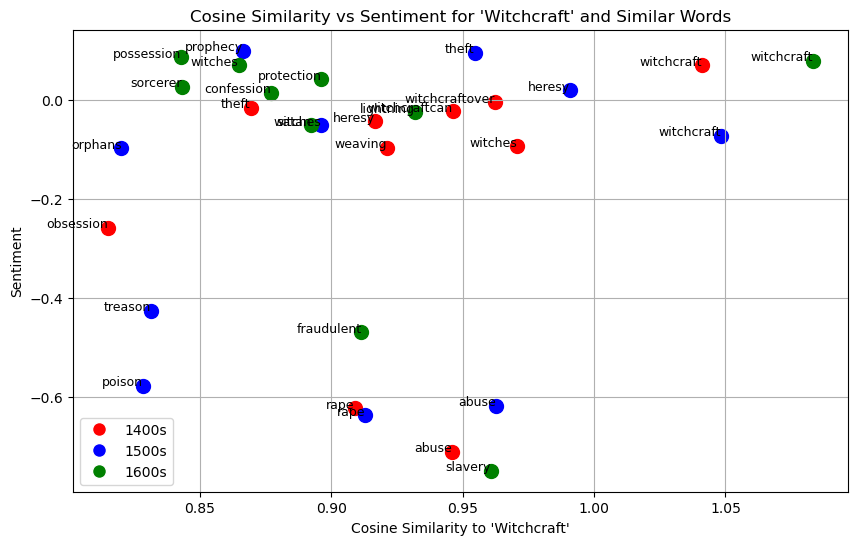

In [19]:
# Example texts for different time periods (replace with actual text files)
text_1400s1 = read_text_from_file('malleus_maleficarum-1487.txt')
text_1400s2 = read_text_from_file('Innocent_VIII_BULL_Summis_desiderantes_1484.txt')
text_1400s3 = read_text_from_file('Johannes_Nider_the_ANT HILL_circa_1437.txt')
text_1500s = read_text_from_file('defense_of_witchcraft_16th_century.txt')
text_1500s2 = read_text_from_file('The Discoverie of Witchcraft 1584.txt')
text_1600s1 = read_text_from_file('Village_Mohra_1669_1670.txt')
text_1600s2 = read_text_from_file('Malmoe_boy_1678.txt')
text_1600s3 = read_text_from_file('A Treatise of Witchcraft 1616.txt')

# Get the most similar words to 'witchcraft' from each time period's text
similar_words_1400s_witchcraft = get_most_similar_words_from_text(text_1400s1 + text_1400s2 + text_1400s3, 'witchcraft', top_n=10)
similar_words_1500s_witchcraft = get_most_similar_words_from_text(text_1500s + text_1500s2, 'witchcraft', top_n=10)
similar_words_1600s_witchcraft = get_most_similar_words_from_text(text_1600s1 + text_1600s2 + text_1600s3, 'witchcraft', top_n=10)

# Prepare the data for plotting
words = []
similarities = []
sentiments = []
time_periods = []

# Process each time period's similar words
for word, similarity in similar_words_1400s_witchcraft:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1400s')

for word, similarity in similar_words_1500s_witchcraft:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1500s')

for word, similarity in similar_words_1600s_witchcraft:
    words.append(word)
    similarities.append(similarity)
    sentiments.append(get_sentiment(word))
    time_periods.append('1600s')

# Define color mapping for each time period
color_mapping = {'1400s': 'red', '1500s': 'blue', '1600s': 'green'}

# Plot the results
plt.figure(figsize=(10, 6))

# Scatter plot with jitter to prevent overlap
for i, (word, sim, sentiment, period) in enumerate(zip(words, similarities, sentiments, time_periods)):
    # Add jitter to prevent overlap of points
    x, y = add_jitter(sim, sentiment)
    
    # Plot each word as a point
    color = color_mapping[period]  # Use the time period to get the color
    plt.scatter(x, y, color=color, s=100)
    
    # Add the word as a label
    plt.text(x, y, word, fontsize=9, ha='right', color='black')

# Add labels and title
plt.title("Cosine Similarity vs Sentiment for 'Witchcraft' and Similar Words")
plt.xlabel("Cosine Similarity to 'Witchcraft'")
plt.ylabel("Sentiment")
plt.grid(True)

# Create a legend for time periods
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[period], markersize=10) for period in ['1400s', '1500s', '1600s']]
plt.legend(handles=handles, labels=['1400s', '1500s', '1600s'])

# Show plot
plt.show()


In [20]:
#finding the mean, medians and variance 

for period in ['1400s', '1500s', '1600s']:
    period_sentiments = [sentiments[i] for i in range(len(sentiments)) if time_periods[i] == period]
    print(f"{period} - Mean Sentiment: {np.mean(period_sentiments):.2f}, Median Sentiment: {np.median(period_sentiments):.2f}, Variance: {np.var(period_sentiments):.2f}")


1400s - Mean Sentiment: -0.17, Median Sentiment: 0.00, Variance: 0.07
1500s - Mean Sentiment: -0.23, Median Sentiment: 0.00, Variance: 0.08
1600s - Mean Sentiment: -0.12, Median Sentiment: 0.00, Variance: 0.06


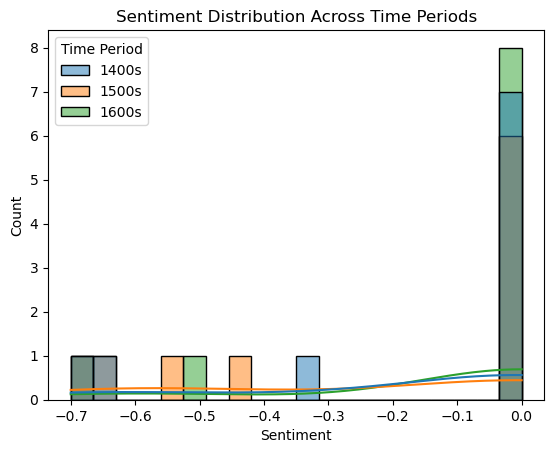

In [21]:
#sentiment distribution

sns.histplot(data={"Sentiment": sentiments, "Time Period": time_periods}, x="Sentiment", hue="Time Period", kde=True, bins=20)
plt.title("Sentiment Distribution Across Time Periods")
plt.show()


In [22]:
#correlation

for period in ['1400s', '1500s', '1600s']:
    period_data = [(similarities[i], sentiments[i]) for i in range(len(similarities)) if time_periods[i] == period]
    similarity_values, sentiment_values = zip(*period_data)
    correlation, p_value = pearsonr(similarity_values, sentiment_values)
    print(f"{period} - Correlation: {correlation:.2f}, P-value: {p_value:.2e}")


1400s - Correlation: 0.18, P-value: 6.13e-01
1500s - Correlation: 0.22, P-value: 5.47e-01
1600s - Correlation: 0.04, P-value: 9.08e-01


In [23]:
#semantic clusters
# Extract embeddings for the similar words
word_embeddings = np.array([get_bert_embedding(word) for word in words])

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(word_embeddings)

# Add cluster labels to each word
clusters = kmeans.labels_

for cluster in range(3):
    cluster_words = [words[i] for i in range(len(words)) if clusters[i] == cluster]
    print(f"Cluster {cluster + 1}: {', '.join(cluster_words)}")


Cluster 1: witchcraft, rape, theft, abuse, witchcraft, rape, treason, theft, abuse, witchcraft, fraudulent
Cluster 2: heresy, witches, weaving, obsession, heresy, witches, orphans, prophecy, poison, witches, slavery, possession, confession, protection, satan, sorcerer, lightning
Cluster 3: witchcraftover, witchcraftcan


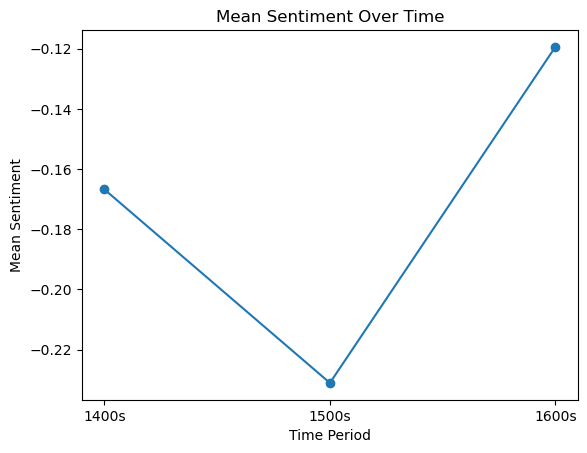

In [24]:
#evolution of sentiment

sentiment_means = {
    period: np.mean([sentiments[i] for i in range(len(sentiments)) if time_periods[i] == period])
    for period in ['1400s', '1500s', '1600s']
}

plt.plot(sentiment_means.keys(), sentiment_means.values(), marker='o')
plt.title("Mean Sentiment Over Time")
plt.xlabel("Time Period")
plt.ylabel("Mean Sentiment")
plt.show()


In [25]:
# Loop through each time period and print top words with cosine similarity
for period in ['1400s', '1500s', '1600s']:
    # Get top words for the period
    top_words = [(words[i], similarities[i]) for i in range(len(similarities)) if time_periods[i] == period]
    
    # Sort top words by cosine similarity in descending order and take the top 5
    top_words = sorted(top_words, key=lambda x: x[1], reverse=True)[:5]
    
    # Print the top words with their cosine similarity
    print(f"Top Words for {period}:")
    for word, similarity in top_words:
        print(f"{word}: {similarity:.4f}")
    print("\n")


Top Words for 1400s:
witchcraft: 1.0000
rape: 0.9112
heresy: 0.9079
witches: 0.9020
witchcraftover: 0.8973


Top Words for 1500s:
witchcraft: 1.0000
rape: 0.9112
heresy: 0.9079
treason: 0.9040
witches: 0.9020


Top Words for 1600s:
witchcraft: 1.0000
witches: 0.9020
slavery: 0.8976
possession: 0.8765
confession: 0.8763




In [26]:
# cross time period analysis

word_set_1400s = set([words[i] for i in range(len(words)) if time_periods[i] == '1400s'])
word_set_1500s = set([words[i] for i in range(len(words)) if time_periods[i] == '1500s'])
word_set_1600s = set([words[i] for i in range(len(words)) if time_periods[i] == '1600s'])

common_words = word_set_1400s & word_set_1500s & word_set_1600s
print(f"Common Words Across Time Periods: {', '.join(common_words)}")


Common Words Across Time Periods: witchcraft, witches
